# Dataset background
This dataset pertains to the Atliq Hotel Group (a fictional company), a hotel chain operating in four cities in India. The decision-making team has noticed a recent decline in Atliq Group's market share and aims to leverage data analysis to make data-driven decisions. The dataset includes three months of booking information, ratings, room categories, hotel ratings, revenue, and other relevant details.This dataset is from a relational database and includes 2 fact tables and 3 dimension tables.
- fact_bookings
- fact_aggregated_bookings
- dim_date
- dim_hotels
- dim_rooms
  
This project utilizes Python (Numpy, Pandas, Matplotlib, Seaborn) to perform ad-hoc analysis, such as analyzing occupancy rates across cities, room types, and weekdays vs. weekends, as well as revenue analysis.

In [30]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

df_bookings = pd.read_csv('datasets/fact_bookings.csv')
df_date = pd.read_csv('datasets/dim_date.csv')
df_hotels = pd.read_csv('datasets/dim_hotels.csv')
df_rooms = pd.read_csv('datasets/dim_rooms.csv')
df_agg_bookings = pd.read_csv('datasets/fact_aggregated_bookings.csv')

---

In [31]:
# create calculated column the occupancy % for hotels
df_agg_bookings["occ_pct"]=df_agg_bookings["successful_bookings"]/df_agg_bookings["capacity"]
df_agg_bookings["occ_pct"]= df_agg_bookings["occ_pct"].apply(lambda x: round(x*100,2))
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74


---

**1. What is an average occupancy rate in each of the room categories?**

In [32]:
# merge the room category name form dim_rooms
df_agg_bookings = pd.merge(df_agg_bookings, df_rooms, left_on = "room_category",right_on="room_id")

# drop the repeated room_id column in table
df_agg_bookings.drop("room_id",axis=1,inplace=True)

# calculate occupancy average by room class
df_room_occ = df_agg_bookings.groupby("room_class")["occ_pct"].mean().round(2)
df_room_occ

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.22
Name: occ_pct, dtype: float64

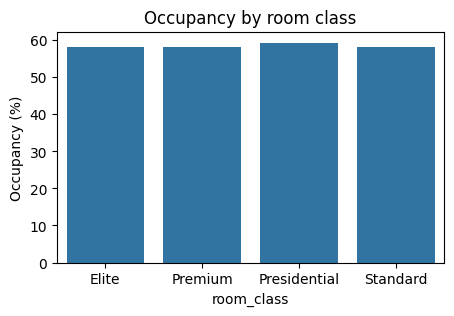

In [34]:
# utilize seaborn plot bar chart
plt.figure(figsize=(5,3))
sns.barplot(df_room_occ)
plt.title("Occupancy by room class")
plt.ylabel("Occupancy (%)")
plt.show()

---

**2. Print average occupancy rate per city**

In [36]:
# merge hotel information form dim_hotels
df_agg_bookings_h = pd.merge(df_agg_bookings, df_hotels, on="property_id")

# calculate occupancy average by city
df_agg_bookings_hs = df_agg_bookings_h.groupby("city")['occ_pct'].mean().round(2)
df_agg_bookings_hs.head()

city
Bangalore    56.59
Delhi        61.61
Hyderabad    58.14
Mumbai       57.94
Name: occ_pct, dtype: float64

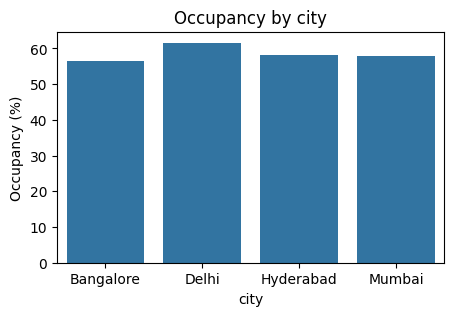

In [37]:
# utilize seaborn plot bar chart
plt.figure(figsize=(5,3))
sns.barplot(df_agg_bookings_hs)
plt.title("Occupancy by city")
plt.ylabel("Occupancy (%)")
plt.show()

---

**3. When was the occupancy better? Weekday or Weekend?**

In [42]:
# merge date information form dim_date
df_agg_bookings_d = pd.merge(df_agg_bookings_h,df_date,left_on="check_in_date",right_on="date")

# calculate occupancy average by day type
df_agg_bookings_ds = df_agg_bookings_d.groupby("day_type")["occ_pct"].mean().round(2)
df_agg_bookings_ds

day_type
weekeday    50.90
weekend     72.39
Name: occ_pct, dtype: float64

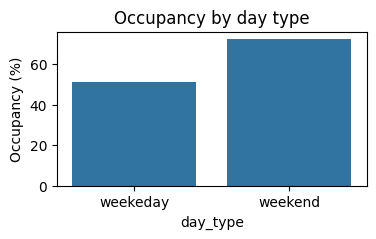

In [41]:
# utilize seaborn plot bar chart
plt.figure(figsize=(4,2))
sns.barplot(df_agg_bookings_ds)
plt.title("Occupancy by day type")
plt.ylabel("Occupancy (%)")
plt.show()

---

**4: In the month of June, what is the occupancy for different cities**

In [43]:
# filter june data
df_agg_bookings_june =df_agg_bookings_d[df_agg_bookings_d["mmm yy"]=='Jun 22']

# calculate occupancy average by city
df_agg_bookings_junes = df_agg_bookings_june.groupby("city")["occ_pct"].mean().round(2)
df_agg_bookings_junes

city
Bangalore    56.58
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Name: occ_pct, dtype: float64

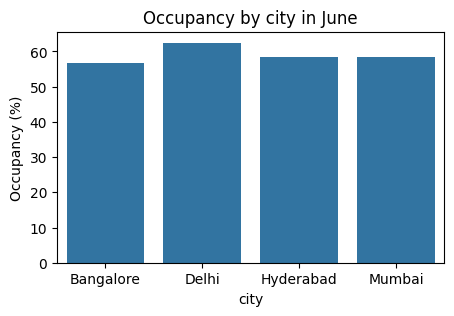

In [44]:
# utilize seaborn plot bar chart
plt.figure(figsize=(5,3))
sns.barplot(df_agg_bookings_junes)
plt.title("Occupancy by city in June")
plt.ylabel("Occupancy (%)")
plt.show()

---

**5. Print revenue realized per city**

In [45]:
# merge data from fact_bookings and dim_hotels
df_bookings_h = pd.merge(df_bookings, df_hotels, on="property_id")

# calculate revenue realized amount by city
df_bookings_s = df_bookings_h.groupby("city")["revenue_realized"].sum()
df_bookings_s

city
Bangalore    420397050
Delhi        294500318
Hyderabad    325232870
Mumbai       668640991
Name: revenue_realized, dtype: int64

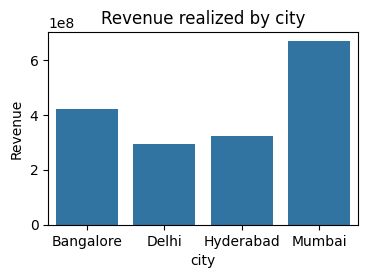

In [48]:
# utilize seaborn plot bar chart
plt.figure(figsize=(4,2.5))
sns.barplot(df_bookings_s)
plt.title("Revenue realized by city")
plt.ylabel("Revenue")
plt.show()

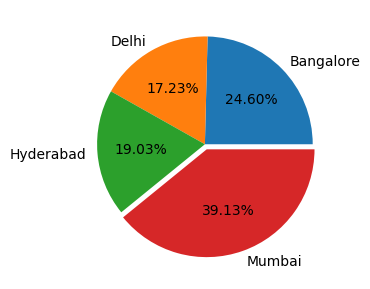

In [49]:
# utilize matplotlib plot pie chart
plt.figure(figsize = (3.5,3.5))
plt.pie(df_bookings_s, labels= df_bookings_s.index, autopct="%1.2f%%",explode = (0,0,0,0.05) )
plt.show()

---

**6. Print month by month revenue**

In [50]:
# handle the date in dim_date to datetime
df_date['date'] = pd.to_datetime(df_date['date'], format='%d-%b-%y')

# handle the date in fact_bookings table to datetime
# There are two type of date format in rows(dd/mm/yyyy, dd-mm-yy)
df_bookings_h['check_in_date'] = df_bookings_h['check_in_date'].astype(str)  
df_bookings_h['check_in_date'] = df_bookings_h['check_in_date'].str.replace('-', '/')
df_bookings_h['check_in_date'] = df_bookings_h['check_in_date'].str.replace('/22', '/2022')
df_bookings_h['check_in_date'] = pd.to_datetime(df_bookings_h['check_in_date'], format='%d/%m/%Y') 

# merge the fact_bookings table and dim_date
df_bookings_all = pd.merge(df_bookings_h,df_date,left_on="check_in_date", right_on="date")

# calculate revenue realized amount by month
df_bookings_alls = df_bookings_all.groupby("mmm yy")['revenue_realized'].sum().sort_index(ascending=False)
df_bookings_alls

mmm yy
May 22    581930666
Jun 22    553932355
Jul 22    572908208
Name: revenue_realized, dtype: int64

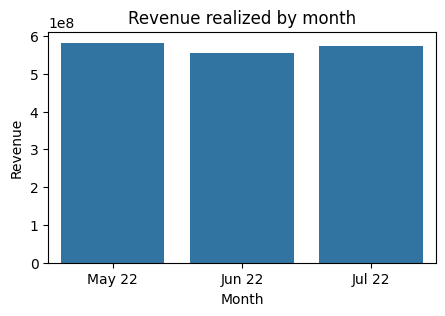

In [51]:
# utilize seaborn plot bar chart
plt.figure(figsize=(5,3))
sns.barplot(df_bookings_alls)
plt.title("Revenue realized by month")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

---

**7. Print revenue realized by different hotels**

In [56]:
# calculate revenue realized amount by hotels
df_bookings_alls = df_bookings_all.groupby("property_name")["revenue_realized"].sum()
df_bookings_alls

property_name
Atliq Bay        260051178
Atliq Blu        260855522
Atliq City       285811939
Atliq Exotica    320312468
Atliq Grands     211532764
Atliq Palace     304081863
Atliq Seasons     66125495
Name: revenue_realized, dtype: int64

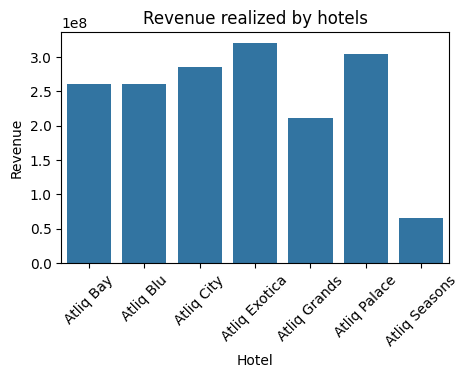

In [57]:
# utilize seaborn plot bar chart
plt.figure(figsize=(5,3))
sns.barplot(df_bookings_alls)
plt.title("Revenue realized by hotels")
plt.xticks(rotation = 45)
plt.xlabel("Hotel")
plt.ylabel("Revenue")
plt.show()

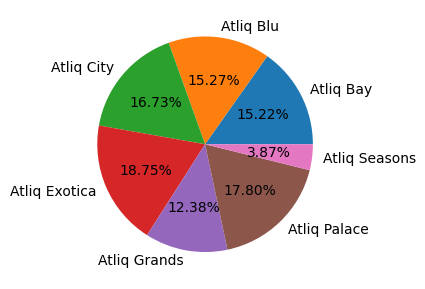

In [59]:
# utilize matplotlib plot pie chart
plt.figure(figsize = (3.5,3.5))
plt.pie(df_bookings_alls, labels= df_bookings_alls.index, autopct="%1.2f%%" )
plt.show()

---

**8. Print a pie chart of revenue realized per booking platform**

In [61]:
df_bookings_allp = df_bookings_all.groupby("booking_platform")["revenue_realized"].sum().round(2)

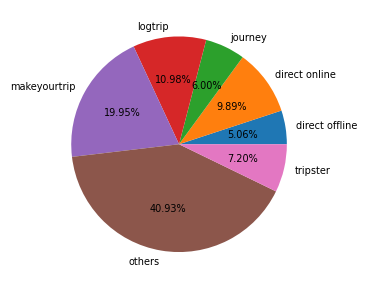

In [62]:
# utilize matplotlib plot pie chart
plt.figure(figsize = (3.5,3.5))
plt.pie(df_bookings_allp, labels= df_bookings_allp.index, autopct="%1.2f%%" , textprops={'fontsize':7}  )
plt.show()